# Basics of Laue Pattern peak search and Unit cell Refinement

## This Notebook is a part of Tutorials on LaueTools Suite.  
Author: J.-S. Micha

Last Revision:   August 2019

tested with python3

**Objectives**

- Load and display Laue pattern images
- Perform a Peak Search
- Perform the indexation of a Laue spots list
- Perform the crystal orientation and unit cell refinement 

Setting absolute path to LaueTools Modules if Lauetools has not been installed with pip. It is assumed that this notebook is located in a subfolder (normally Notebooks)

In [1]:
LaueToolsCode_Folder = '..'
import sys,os
abspathLaueTools =os.path.abspath(LaueToolsCode_Folder)
print('abspathLaueTools',abspathLaueTools)
sys.path.append(LaueToolsCode_Folder)

abspathLaueTools /home/st242386/GitLab/LaueTools_GitLab/lauetools/LaueTools


In [2]:
import LaueTools
LaueTools.__file__

'/home/st242386/anaconda3/lib/python3.6/site-packages/LaueTools/__init__.py'

In [3]:
#%matplotlib inline
%matplotlib notebook

import time,copy,os

# Third party modules
import matplotlib     # graphs and plots
import matplotlib.pyplot as plt
import numpy as np    # numerical arrays

# LaueTools modules

import LaueTools.IOLaueTools as IOLT   # read and write ASCII file  (IO) 
import LaueTools.readmccd as RMCCD # read CCD and detector binary file, PeakSearch methods


LaueToolsProjectFolder /home/st242386/anaconda3/lib/python3.6/site-packages/LaueTools
Missing library libtiff, Please install: pylibtiff if you need open some tiff images
module Image / PIL is not installed
Cython compiled module 'gaussian2D' for fast computation is not installed!
module Image / PIL is not installed


Considering single image analysis (that belong to the LaueTools distribution)

In [4]:
t0 = time.time()
LaueToolsExamplesFolder = os.path.join(LaueToolsCode_Folder,'Examples')

imageindex = None
imagefolder =os.path.join(LaueToolsCode_Folder,'LaueImages')
imagefilename = 'Ge_blanc_0000.mccd'

#imagefolder =os.path.join(LaueToolsCode_Folder,'LaueImages')
#imagefilename = 'CdTe_I999_03Jul06_0200.mccd'

Considering analysis of one image in dataset

**For information:** select image file of interest, in case of set of images with index. Then, splitting imagefilename allows to loop over images:  prefix+index.extension

In [5]:
%%script false
# just to show (cell not executed)

imagefolder ='/home/micha/LaueProjects/VO2/ToScript/Data_VO2'

prefixfilename= 'CT30_'
imageindex=20

imagefilename = prefixfilename+'%04d.mccd'%imageindex
print("imagefilename :",imagefilename)
# you should see: imagefilename : CT30_0020.mccd


**Read image file, get data and display it**

Function `readCCDimage()` returns `dataimage` as a 2D numpy array with the proper dimensions and orientation given by `framedim` and the geometrical transformations labelled by `fliprot`

Displaying Ge_blanc_0000.mccd

nb elements 4194304
framedim (2048, 2048)
framedim nb of elements 4194304


<IPython.core.display.Javascript object>


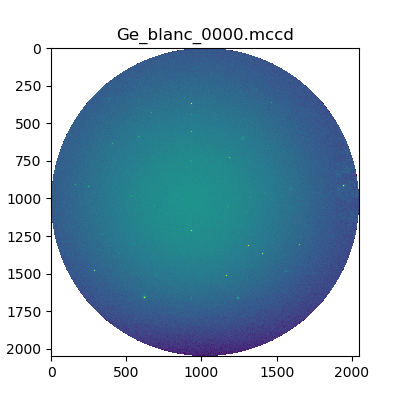

/home/st242386/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


Text(0.5,1,'Ge_blanc_0000.mccd')

In [9]:
print('Displaying %s\n'%imagefilename)
dataimage, framedim, fliprot = RMCCD.readCCDimage(imagefilename,dirname=imagefolder,CCDLabel='MARCCD165')
fullpathimagefile= os.path.join(imagefolder,imagefilename)

fig, ax = plt.subplots(figsize=(4,4))

ax.imshow(np.log10(dataimage),vmin=1,vmax=3)
ax.set_title('%s'%imagefilename)

***peaksearch*** is performed in two main steps:
- 1) blobs or local maxima finder
- 2) for blob, refinement starting from blob average center.

For the first step, `readCCDimage()` is called to obtain raw data if no different data array is provided with the argument `Data_for_localMaxima` (set to `None` by default). After second step, Peaksearch results can be purged from peaks already present in a file as an optional argument `Remove_BlackListedPeaks_fromfile`.

In [7]:
import os
ti1= time.time()

#blacklistedpeaksfile=os.path.join(folder,'Blacklist.dat')
blacklistedpeaksfile = None

res=RMCCD.PeakSearch(fullpathimagefile,CCDLabel='MARCCD165',
                     return_histo=0,local_maxima_search_method=0,
                     IntensityThreshold=200,
                     boxsize=5,
                     fit_peaks_gaussian=1,
                     FitPixelDev=10,
                     Data_for_localMaxima=None,#newdataimage,
                     Remove_BlackListedPeaks_fromfile=blacklistedpeaksfile)
tps =time.time()
print("peak search time",tps-ti1)

CCDLabel:  MARCCD165
nb of pixels (4194304,)
nb elements 4194304
framedim (2048, 2048)
framedim nb of elements 4194304
image from filename ../LaueImages/Ge_blanc_0000.mccd read!
Read Image. Execution time : 0.006 seconds
Data.shape for local maxima (2048, 2048)
Using simple intensity thresholding to detect local maxima (method 1/3)
len(peaklist) 82
Local maxima search. Execution time : 0.336 seconds
Keep 82 from 82 initial peaks (ready for peak positions and shape fitting)

*****************
82 local maxima found

 Fitting of each local maxima

addImax False
nb elements 4194304
framedim (2048, 2048)
framedim nb of elements 4194304
framedim in readoneimage_manycrops (2048, 2048)
fitting time for 82 peaks is : 0.2039
nb of results:  82
After fitting, 0/82 peaks have been rejected
 due to (final - initial position)> FitPixelDev = 10
0 spots have been rejected
 due to negative baseline
0 spots have been rejected
 due to much intensity 
0 spots have been rejected
 due to weak intensity 
0 s

**Spots properties**:

peak_X, peak_Y, peak_I, peak_fwaxmaj, peak_fwaxmin, peak_inclination, Xdev, Ydev, peak_bkg, Ipixmax,

Spots are sorted by intensity (according to the 2D gaussian fit)

In [8]:
peaklist=res[0]
print('Digital Spots properties for the 5 most intense spots')
print(peaklist[:6])

Digital Spots properties for the 5 most intense spots
[[ 6.231334887002143e+02  1.657728161614024e+03  2.979937967247360e+04
   8.515577956136006e-01  7.511212178165599e-01  1.820409415704489e+01
   1.334887002143432e-01 -2.718383859764799e-01  2.966046444454810e+02
   2.000000000000000e+02]
 [ 1.244326205473488e+03  1.662150473603958e+03  2.242563070589073e+04
   6.977180389301006e-01  6.390759549880105e-01  1.293529253564775e+02
   3.262054734875619e-01  1.504736039580621e-01  1.998717405717028e+02
   2.000000000000000e+02]
 [ 9.330365915823824e+02  1.215440948340315e+03  2.219753607623998e+04
   7.846021988134166e-01  7.862341648303387e-01  3.246533552343026e+02
   3.659158238235705e-02  4.409483403153445e-01  2.110241433113940e+02
   2.000000000000000e+02]
 [ 5.852254505694141e+02  5.887990375606668e+02  9.528825561251553e+03
   7.791458064142315e-01  7.399755695034808e-01  1.068330480796285e+02
   2.254505694140789e-01 -2.009624393332388e-01  1.501265419627265e+02
   2.00000000000

In [9]:
print('X, Y pixel refinement positions for the first 5 spots')
peaklist[:5,:2]

X, Y pixel refinement positions for the first 5 spots


array([[ 623.1334887002143, 1657.7281616140235],
       [1244.3262054734876, 1662.150473603958 ],
       [ 933.0365915823824, 1215.4409483403153],
       [ 585.2254505694141,  588.7990375606668],
       [1276.6072592468026,  600.299820878132 ]])

*add markers to image*

In [10]:
if len(peaklist)<=1: raise ValueError

#datatoplot=newdataimage
datatoplot = dataimage
    
fig, ax = plt.subplots()
ax.imshow(datatoplot,vmin=0,vmax=1000,cmap='hot')

from matplotlib.patches import Circle

F=plt.gcf()
axes=F.gca()
F.get_dpi()
defaultSize=F.get_size_inches()
F.set_size_inches(defaultSize*1.5)

# delete previous patches:

axes.patches = []

# rebuild circular markers
largehollowcircles = []
smallredcircles = []
# correction only to fit peak position to the display
offset_convention = np.array([1, 1])

XYlist = peaklist[:, :2] - offset_convention

for po in XYlist:

    large_circle = Circle(po, 7, fill=False, color='b')
    center_circle = Circle(po, .5 , fill=True, color='r')
    axes.add_patch(large_circle)
    axes.add_patch(center_circle)

    largehollowcircles.append(large_circle)
    smallredcircles.append(center_circle)

<IPython.core.display.Javascript object>

**List of peaks props is written in a file with extension .dat, here the variable is `datfilename`**

In [11]:
if imageindex is not None:
    peaklistprefix=prefixfilename+'cor_%04d'%imageindex
else:
    peaklistprefix=imagefilename.split('.')[0]+'Notebook'
print('peaklist.shape',peaklist.shape)
print("fullpathimagefile",fullpathimagefile)
print('imagefolder',imagefolder)
RMCCD.writepeaklist(peaklist,peaklistprefix,outputfolder=imagefolder,initialfilename=fullpathimagefile)

datfilename = peaklistprefix+'.dat'

peaklist.shape (82, 10)
fullpathimagefile ../LaueImages/Ge_blanc_0000.mccd
imagefolder ../LaueImages
table of 82 peak(s) with 10 columns has been written in 
/home/micha/LaueToolsPy3/LaueTools/LaueImages/Ge_blanc_0000Notebook.dat


### Now indexing

##### geometry calibration parameters

Either you fill manually the dict of parameters or you read a file  .det

In [12]:
# detector geometry and parameters as read from Geblanc0000.det
calibration_parameters = [70.775, 941.74, 1082.57, 0.631, -0.681]
CCDCalibdict = {}
CCDCalibdict['CCDCalibParameters'] = calibration_parameters
CCDCalibdict['framedim'] = (2048, 2048)
CCDCalibdict['detectordiameter'] = 165.
CCDCalibdict['kf_direction'] = 'Z>0'
CCDCalibdict['xpixelsize'] = 0.07914

# CCDCalibdict can also be simply build by reading the proper .det file
print("reading geometry calibration file")
CCDCalibdict=IOLT.readCalib_det_file(os.path.join(imagefolder,'Geblanc0000.det'))
CCDCalibdict['kf_direction'] = 'Z>0'

reading geometry calibration file
calib =  [ 7.07760e+01  9.41760e+02  1.08244e+03  6.29000e-01 -6.85000e-01
  7.91400e-02  2.04800e+03  2.04800e+03]
matrix =  [ 0.995829 -0.071471 -0.056709  0.012247  0.720654 -0.693187  0.09041
  0.689602  0.718523]


**creation of a .cor file containing accurate scattering angles thanks to detector geometry parameters**

Only list of spots with scattering angles can be indexed. In LaueTools .dat file contains only X, Y pixel positions, .cor file contains in addition 2theta and chi scattering angles, and .fit file in addition indexed results properties (such as h, k, l, energy, grain index ...)

In [13]:
import LaueTools.LaueGeometry as LTGeo
LTGeo.convert2corfile(datfilename,
                         calibration_parameters,
                         dirname_in=imagefolder,
                        dirname_out=imagefolder,
                        CCDCalibdict=CCDCalibdict)
corfilename = datfilename.split('.')[0] + '.cor'
fullpathcorfile = os.path.join(imagefolder,corfilename)

Entering CrystalParameters ******---***************************


nb of spots and columns in .dat file (82, 3)
file :../LaueImages/Ge_blanc_0000Notebook.dat
containing 82 peaks
(2theta chi X Y I) written in ../LaueImages/Ge_blanc_0000Notebook.cor


#### create instance of an objet spotsset class

In [14]:
import LaueTools.indexingSpotsSet as ISS
DataSet = ISS.spotsset()

DataSet.importdatafromfile(fullpathcorfile)

Cython compiled module for fast computation of Laue spots is not installed!
Cython compiled 'angulardist' module for fast computation of angular distance is not installed!
Using default module
Cython compiled module for fast computation of angular distance is not installed!
module Image / PIL is not installed
CCDcalib in readfile_cor {'dd': 70.776, 'xcen': 941.76, 'ycen': 1082.44, 'xbet': 0.629, 'xgam': -0.685, 'xpixelsize': 0.07914, 'ypixelsize': 0.07914, 'CCDLabel': 'MARCCD165', 'framedim': [2048.0, 2048.0], 'detectordiameter': 162.07872, 'kf_direction': 'Z>0', 'pixelsize': 0.07914}
CCD Detector parameters read from .cor file
CCDcalibdict {'dd': 70.776, 'xcen': 941.76, 'ycen': 1082.44, 'xbet': 0.629, 'xgam': -0.685, 'xpixelsize': 0.07914, 'ypixelsize': 0.07914, 'CCDLabel': 'MARCCD165', 'framedim': [2048.0, 2048.0], 'detectordiameter': 162.07872, 'kf_direction': 'Z>0', 'pixelsize': 0.07914}


True

In [15]:
DataSet.getUnIndexedSpotsallData()[:3]

array([[ 0.0000000e+00,  5.8426915e+01,  2.0130035e+01,  6.2313000e+02,
         1.6577300e+03,  2.9799380e+04],
       [ 1.0000000e+00,  5.7634672e+01, -1.8415523e+01,  1.2443300e+03,
         1.6621500e+03,  2.2425630e+04],
       [ 2.0000000e+00,  8.0919846e+01,  6.6158100e-01,  9.3304000e+02,
         1.2154400e+03,  2.2197540e+04]])

***Set parameters for indexation: Ge, maximum energy***

All materials are listed in dict_LaueTools.py in dict_Materials. You can edit/modify the module (then a restart of the kernel is necessary)

In [16]:
emin=5
# emax can be lowered for large unit cell indexation (but greater than BM32 highest energy is meaningless)
emax=22
# key of materials 
key_material='Ge'

dict_indexrefine = {# recognition angle parameters from two sets A and B
                   'AngleTolLUT': 0.5,
                   'nlutmax':3,
                   'central spots indices': [0,1,2,3,4],  # spots set A 
                   'NBMAXPROBED': 10,  # spots set B
                   'MATCHINGRATE_ANGLE_TOL': 0.2,
                # refinement parameters (loop over narrower matching angles)
                   'list matching tol angles':[0.5,0.2,0.1],
               
                # minor parameters
                'MATCHINGRATE_THRESHOLD_IAL': 100,
                   'UseIntensityWeights': False,
                   'nbSpotsToIndex':10000,
                   'MinimumNumberMatches': 3,
                   'MinimumMatchingRate':3
                   }

#
grainindex=0
DataSet = ISS.spotsset()
    
DataSet.pixelsize = CCDCalibdict['xpixelsize']
DataSet.dim = CCDCalibdict['framedim']
DataSet.detectordiameter = CCDCalibdict['detectordiameter']
DataSet.kf_direction = CCDCalibdict['kf_direction']
DataSet.key_material = key_material
DataSet.emin = emin
DataSet.emax = emax

**Before launching the indexation procedure you may want to check a solution found elsewhere or sometimes ago. Then fill `previousResults` as shown below**

In [17]:
#CheckFirstThisMatrix=np.array([[-0.44486058225058 ,  0.098996190230096 ,-0.897868909077371],[-0.883970521873963,0.1130536332378 , 0.462465547362675],
# [ 0.143878606007886, 0.993706753289519 , 0.035064809225047]])

# nb of matrices, list of matrices to check, dummy parameter, dummy parameter
#previousResults = 1,[CheckFirstThisMatrix],50,50


previousResults = None

**Then launch indexation by specifying some arguments of the method `IndexSpotsSet`:**

    - nbGrainstoFind: nb of grains of this material you want to find
    - set_central_spots_hkl: imposed miller indices [h,k,l] of central spots (set A of spots)  else : None
    ...

In [18]:
t0 =time.time()

DataSet.IndexSpotsSet(fullpathcorfile, key_material, emin, emax, dict_indexrefine, None,
                         use_file=1, # read .cor file and reset also spots properties dictionary
                         IMM=False,LUT=None,n_LUT=dict_indexrefine['nlutmax'],angletol_list=dict_indexrefine['list matching tol angles'],
                        nbGrainstoFind=1,  # nb of grains of the same material in this case
                        set_central_spots_hkl=[0,1,1],  # set hkl of spots of set A
                        MatchingRate_List=[10, 10, 10,10,10,10,10,10],  # minimum matching rate figure to keep on looping for refinement
                        verbose=0,
                        previousResults=previousResults, # check before the orientation if not None
                        corfilename=corfilename)

# write unindexed spots list in a .cor file
DataSet.writecorFile_unindexedSpots(corfilename=corfilename,
                                                dirname=imagefolder,
                                                filename_nbdigits=4)

# write .fit file of indexed spots belonging to grain #0
DataSet.writeFitFile(0,corfilename=corfilename,dirname=imagefolder)

tf = time.time()-t0

CCDcalib in readfile_cor {'dd': 70.776, 'xcen': 941.76, 'ycen': 1082.44, 'xbet': 0.629, 'xgam': -0.685, 'xpixelsize': 0.07914, 'ypixelsize': 0.07914, 'CCDLabel': 'MARCCD165', 'framedim': [2048.0, 2048.0], 'detectordiameter': 162.07872, 'kf_direction': 'Z>0', 'pixelsize': 0.07914}
CCD Detector parameters read from .cor file
CCDcalibdict {'dd': 70.776, 'xcen': 941.76, 'ycen': 1082.44, 'xbet': 0.629, 'xgam': -0.685, 'xpixelsize': 0.07914, 'ypixelsize': 0.07914, 'CCDLabel': 'MARCCD165', 'framedim': [2048.0, 2048.0], 'detectordiameter': 162.07872, 'kf_direction': 'Z>0', 'pixelsize': 0.07914}
self.pixelsize in IndexSpotsSet 0.07914
ResolutionAngstromLUT in IndexSpotsSet False

 Remaining nb of spots to index for grain #0 : 82


 ******
start to index grain #0 of Material: Ge 

******

providing new set of matrices Using Angles LUT template matching
nbspots 82
NBMAXPROBED 10
nbspots 82
set_central_spots_hkl [0, 1, 1]
Central set of exp. spotDistances from spot_index_central_list probed
self.a

For angular tolerance 0.50 deg
Nb of pairs found / nb total of expected spots: 81/147
Matching Rate : 55.10
Nb missing reflections: 66

grain #0 : 81 links to simulated spots have been found 
***********mean pixel deviation    0.2522039400422887     ********
Initial residues [0.191356096913678 0.158479888122211 0.125984922997516 0.007464331088751
 0.220920883122328 0.065197410024489 0.405464259132319 0.079769518806149
 0.309835172580193 0.024815180122634 0.146635771529913 0.197926454567734
 0.253815574123594 0.241517985294699 0.301875442673439 0.217498144625921
 0.186026257638361 0.152430964466482 0.022468745875909 0.372498387808433
 0.225884815274198 0.155682523936061 0.308213213363587 0.354423361607117
 0.237793437184287 0.344146246502948 0.117700835663451 0.22732103372742
 0.263538267437741 0.133994037769124 0.091015982918167 0.367309714380722
 0.359174426753832 0.281533512444384 0.191021625928391 0.219461033259323
 0.371983339466526 0.3512796731268   0.298580209240117 0.44793602077

code results 1
nb iterations 189
mesg Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
strain_sol [ 9.999862096544356e-01  9.999941276097474e-01 -7.144700897145182e-06
  5.728542645493929e-05  1.242229382006964e-05  2.977984275077042e-05
 -1.953472667313407e-03  6.919002586889341e-03]


 **************  End of Fitting  -  Final errors  ****************** 


***********mean pixel deviation    0.18215488925149526     ********
devstrain, lattice_parameter_direct_strain [[-4.815998025634964e-06  5.250997004746657e-06 -2.870284279887629e-05]
 [ 5.250997004746657e-06  7.352907498721824e-06 -9.199263307200638e-06]
 [-2.870284279887629e-05 -9.199263307200638e-06 -2.536909473086861e-06]] [ 5.657509728355469  5.657578574250457  5.657522951317707
 90.0010541881893   90.00328909016345  89.99939828842365 ]
For comparison: a,b,c are rescaled with respect to the reference value of a = 5.657500 Angstroms
lattice_parameter_direct_strain [ 5.6575             5.6

In [19]:
print('Indexation time %.3f second(s) \n\n'%tf)
print('Spots properties of the 10 first spots that have been indexed (sorted by intensity)')
print('#spot 2theta chi X, Y intensity h k l energy')
print(DataSet.getSpotsFamilyallData(0)[:10])

Indexation time 2.487 second(s) 


Spots properties of the 10 first spots that have been indexed (sorted by intensity)
#spot 2theta chi X, Y intensity h k l energy
[[ 0.000000000000000e+00  5.842691500000000e+01  2.013003500000000e+01
   6.231300000000000e+02  1.657730000000000e+03  2.979938000000000e+04
   4.000000000000000e+00  2.000000000000000e+00  2.000000000000000e+00
   1.099874517758171e+01]
 [ 1.000000000000000e+00  5.763467200000000e+01 -1.841552300000000e+01
   1.244330000000000e+03  1.662150000000000e+03  2.242563000000000e+04
   2.000000000000000e+00  2.000000000000000e+00  4.000000000000000e+00
   1.113626245226060e+01]
 [ 2.000000000000000e+00  8.091984600000001e+01  6.615810000000000e-01
   9.330400000000000e+02  1.215440000000000e+03  2.219754000000000e+04
   3.000000000000000e+00  3.000000000000000e+00  3.000000000000000e+00
   8.773642495456929e+00]
 [ 3.000000000000000e+00  1.168117220000000e+02  2.128975200000000e+01
   5.852300000000000e+02  5.888000000000000e+02 

DataSet is an object with many attributes and methods related to spots properties (indexed or not, belonging to grains counted from zero). By press Tab key after having typed DataSet. can show you infos about spots

In [20]:
DataSet.B0matrix

array([[ 1.767565178965975e-01, -2.842461599074922e-17,
        -2.842461599074922e-17],
       [ 0.000000000000000e+00,  1.767565178965975e-01,
        -1.082321519352500e-17],
       [ 0.000000000000000e+00,  0.000000000000000e+00,
         1.767565178965975e-01]])